In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("../model_predictions.csv")
df

,y_test,Linear_Pred,Lasso_Pred,DecisionTree_Pred,RandomForest_Pred,Baseline_Pred
0,2.0,1.264820,1.679210,2.131143,1.411316,1.395712
1,1.0,0.133072,0.256947,0.348312,0.160406,0.199949
2,1.0,0.133072,0.246898,0.348312,0.160406,0.199949
3,1.0,0.133072,0.236848,0.348312,0.160406,0.199949
4,2.0,0.698946,0.932905,0.348312,0.608644,0.606259
...,...,...,...,...,...,...
382999,0.0,0.171066,0.268324,0.348312,0.306690,0.199949
383000,0.0,0.139446,0.134746,0.348312,0.202969,0.199949
383001,0.0,0.171066,0.258275,0.348312,0.286512,0.199949
383002,0.0,0.139446,0.160919,0.348312,0.173000,0.199949


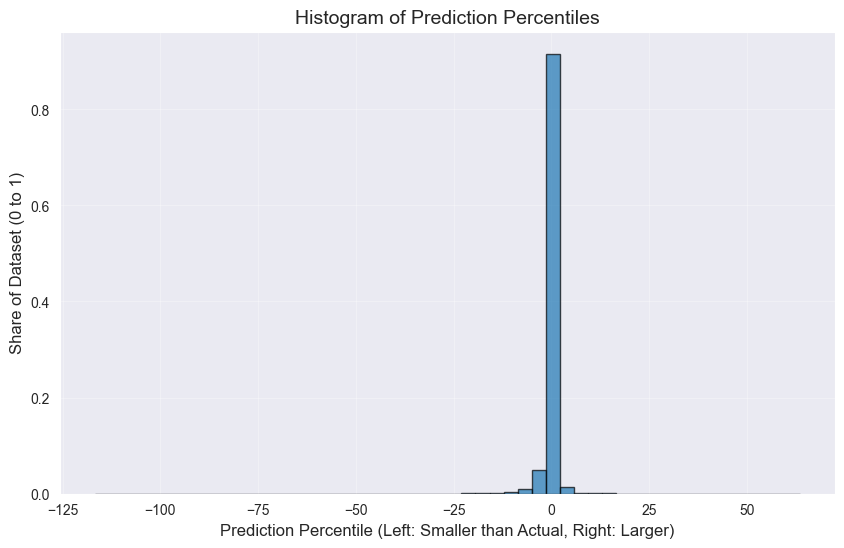

In [2]:
# First implementation for Linear Regression
predictions = df["Linear_Pred"]
actuals = df["y_test"]

# Calculate the prediction error
errors = predictions - actuals

# Convert errors to percentiles
percentiles = np.percentile(errors, np.linspace(0, 100, 100))

# Calculate the histogram
counts, bin_edges = np.histogram(errors, bins=50, density=True)

# Normalize counts to represent share of the dataset
normalized_counts = counts / np.sum(counts)

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(bin_edges[:-1], normalized_counts, width=np.diff(bin_edges), align='edge', edgecolor='k', alpha=0.7)

# Customize the plot
plt.xlabel('Prediction Percentile (Left: Smaller than Actual, Right: Larger)', fontsize=12)
plt.ylabel('Share of Dataset (0 to 1)', fontsize=12)
plt.title('Histogram of Prediction Percentiles', fontsize=14)
plt.grid(alpha=0.3)

# Show the plot
plt.show()


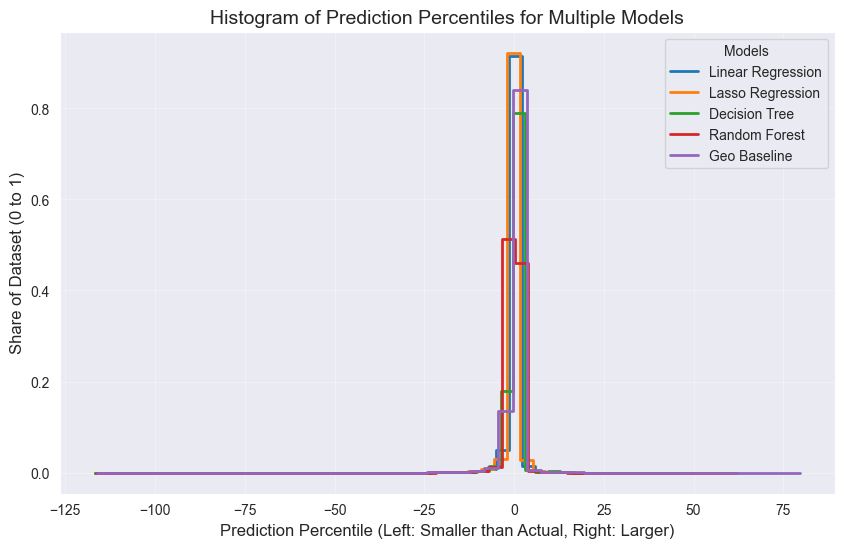

In [3]:
# Combined Histogram of all models

models_predictions = {
    "Linear Regression": df["Linear_Pred"],
    "Lasso Regression": df["Lasso_Pred"],
    "Decision Tree": df["DecisionTree_Pred"],
    "Random Forest": df["RandomForest_Pred"],
    "Geo Baseline": df["Baseline_Pred"]
}

actuals = df["y_test"]

# Plot setup
plt.figure(figsize=(10, 6))

# Loop over models and plot their histograms
for model_name, predictions in models_predictions.items():
    # Calculate the prediction error
    errors = predictions - actuals

    # Calculate the histogram
    counts, bin_edges = np.histogram(errors, bins=50, density=True)

    # Normalize counts to represent share of the dataset
    normalized_counts = counts / np.sum(counts)

    # Plot the histogram
    plt.step(bin_edges[:-1], normalized_counts, where='post', label=model_name, linewidth=2)

# Customize the plot
plt.xlabel('Prediction Percentile (Left: Smaller than Actual, Right: Larger)', fontsize=12)
plt.ylabel('Share of Dataset (0 to 1)', fontsize=12)
plt.title('Histogram of Prediction Percentiles for Multiple Models', fontsize=14)
plt.legend(title="Models")
plt.grid(alpha=0.3)

# Show the plot
plt.show()

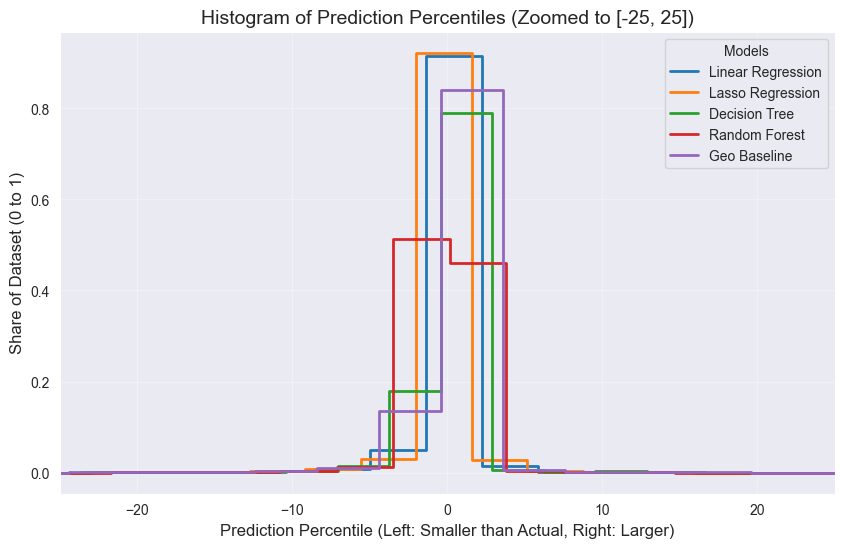

In [4]:
# Plot setup
plt.figure(figsize=(10, 6))

# Loop over models and plot their histograms
for model_name, predictions in models_predictions.items():
    # Calculate the prediction error
    errors = predictions - actuals

    # Calculate the histogram
    counts, bin_edges = np.histogram(errors, bins=50, density=True)

    # Normalize counts to represent share of the dataset
    normalized_counts = counts / np.sum(counts)

    # Plot the histogram
    plt.step(bin_edges[:-1], normalized_counts, where='post', label=model_name, linewidth=2)

# Zoom in by setting x-axis limits to [-25, 25]
plt.xlim(-25, 25)

# Customize the plot
plt.xlabel('Prediction Percentile (Left: Smaller than Actual, Right: Larger)', fontsize=12)
plt.ylabel('Share of Dataset (0 to 1)', fontsize=12)
plt.title('Histogram of Prediction Percentiles (Zoomed to [-25, 25])', fontsize=14)
plt.legend(title="Models")
plt.grid(alpha=0.3)

# Show the plot
plt.show()


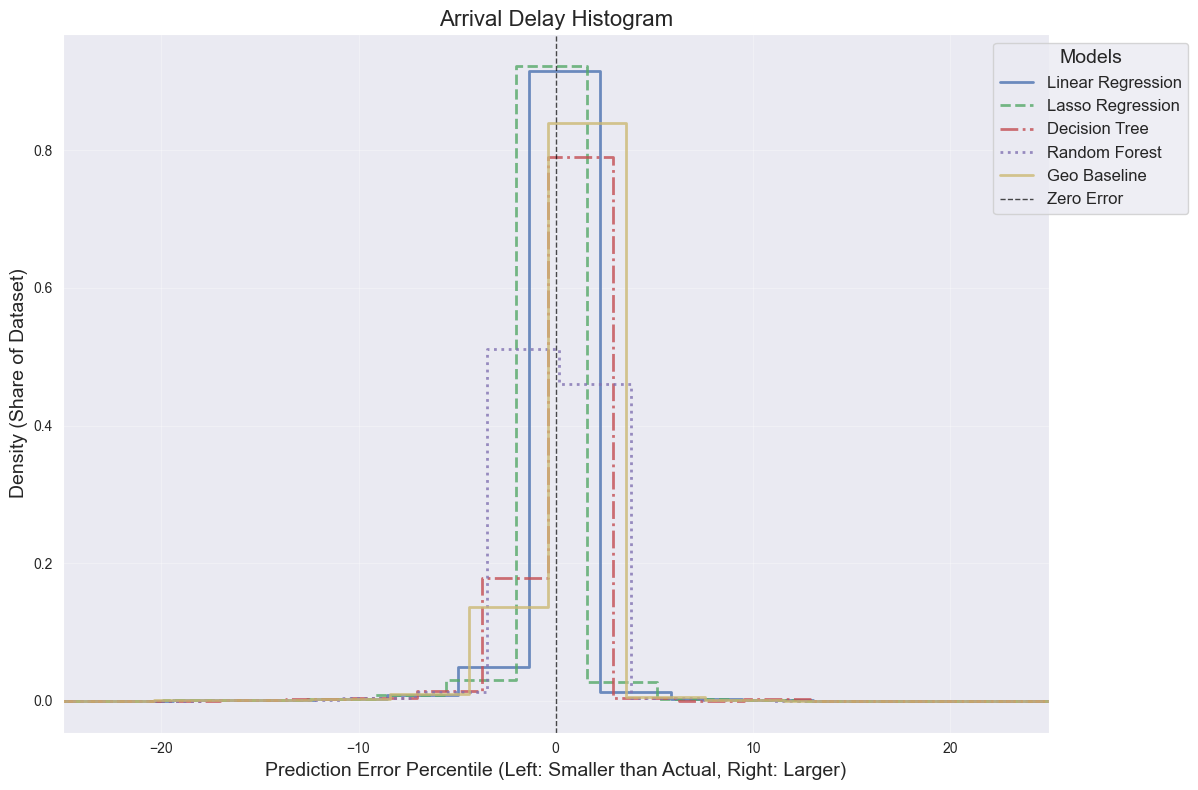

In [68]:
# Plot setup
plt.figure(figsize=(12, 8))

# Loop over models and plot their histograms with enhanced styles
line_styles = ['-', '--', '-.', ':', '-']  # Define a variety of line styles
for i, (model_name, predictions) in enumerate(models_predictions.items()):
    # Calculate the prediction error
    errors = predictions - actuals

    # Calculate the histogram
    counts, bin_edges = np.histogram(errors, bins=50, density=True)

    # Normalize counts to represent share of the dataset
    normalized_counts = counts / np.sum(counts)

    # Plot the histogram with a unique style for each model
    plt.step(bin_edges[:-1], normalized_counts, where='post',
             label=model_name, linewidth=2, linestyle=line_styles[i % len(line_styles)], alpha=0.8)

# Highlight the center (zero-error line)
plt.axvline(x=0, color='black', linestyle='--', linewidth=1, alpha=0.7, label="Zero Error")

# Zoom in by setting x-axis limits to [-25, 25]
plt.xlim(-25, 25)

# Customize the plot further
plt.xlabel('Prediction Error Percentile (Left: Smaller than Actual, Right: Larger)', fontsize=14)
plt.ylabel('Density (Share of Dataset)', fontsize=14)
plt.title('Arrival Delay Histogram', fontsize=16)
plt.legend(title="Models", fontsize=12, title_fontsize=14, loc='upper right', bbox_to_anchor=(1.15, 1))
plt.grid(alpha=0.3)

# Adjust layout for better spacing
plt.tight_layout()
plt.savefig("unfilled_histogram_all_models.png", format='png', dpi=300)
# Show the plot
plt.show()

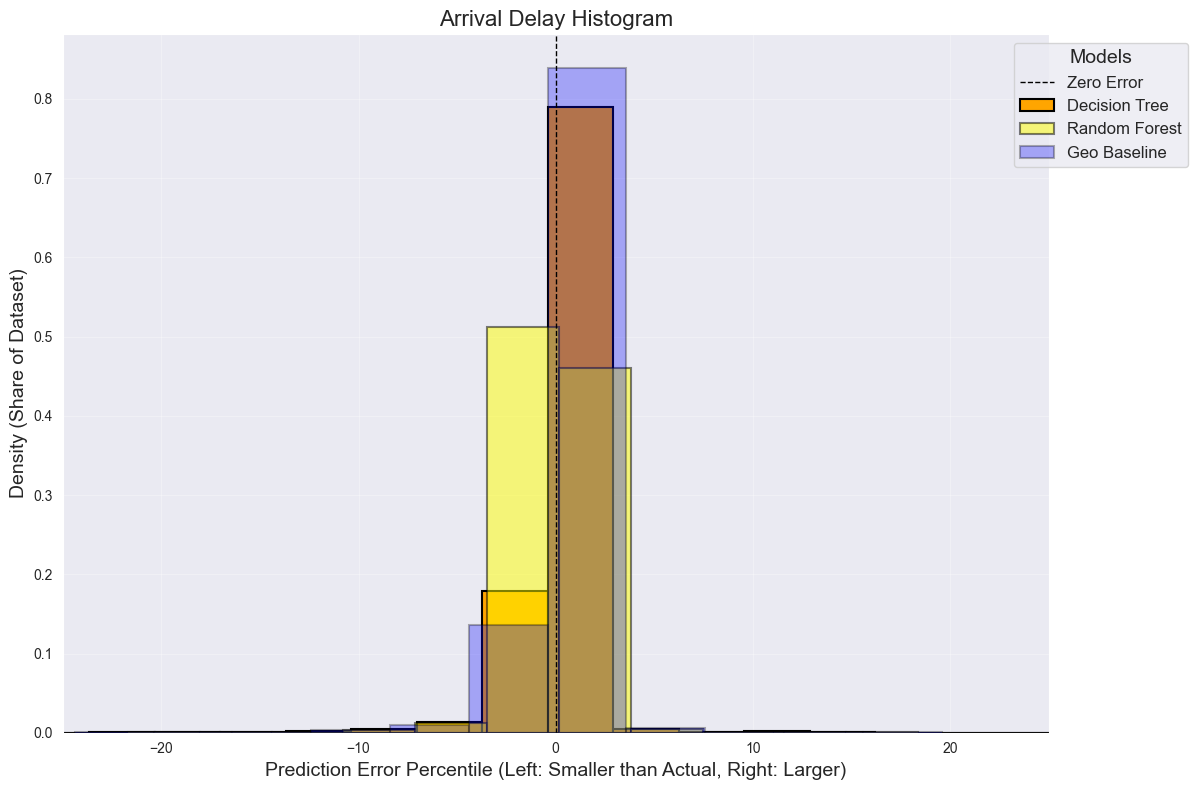

In [67]:
import numpy as np
import matplotlib.pyplot as plt

# Plot setup
plt.figure(figsize=(12, 8))

# Define a list of colors (one for each model)
colors = ['green', 'red', 'orange', 'yellow', 'blue']
alphas = [0.7,0.3,1,0.5,0.3]

# Loop over models and plot their histograms with enhanced styles
for i, (model_name, predictions) in enumerate(models_predictions.items()):
    if model_name == "Linear Regression" or model_name == "Lasso Regression":
        continue
    # Calculate the prediction error
    errors = predictions - actuals

    # Calculate the histogram counts and bin edges
    counts, bin_edges = np.histogram(errors, bins=50)

    # Normalize counts manually (so area under curve sums to 1)
    normalized_counts = counts / np.sum(counts)

    # Plot the normalized histogram with a unique color for each model
    plt.bar(bin_edges[:-1], normalized_counts, width=np.diff(bin_edges), align='edge', alpha=alphas[i],
            label=model_name, color=colors[i], edgecolor='black', linewidth=1.5)

# Highlight the center (zero-error line)
plt.axvline(x=0, color='black', linestyle='--', linewidth=1, alpha=1, label="Zero Error")

# Zoom in by setting x-axis limits to [-25, 25] without changing y-axis scaling
plt.xlim(-25, 25)

# Customize the plot further
plt.xlabel('Prediction Error Percentile (Left: Smaller than Actual, Right: Larger)', fontsize=14)
plt.ylabel('Density (Share of Dataset)', fontsize=14)
plt.title('Arrival Delay Histogram', fontsize=16)
plt.legend(title="Models", fontsize=12, title_fontsize=14, loc='upper right', bbox_to_anchor=(1.15, 1))
plt.grid(alpha=0.3)

# Adjust layout for better spacing
plt.tight_layout()

# Save the plot
plt.savefig("histogram_dt_rf_baseline.png", format='png', dpi=300)

# Show the plot
plt.show()


In [ ]:
"""models_predictions = {
    "Linear Regression": df["Linear_Pred"],
    "Lasso Regression": df["Lasso_Pred"],
    "Decision Tree": df["DecisionTree_Pred"],
    "Random Forest": df["RandomForest_Pred"],
    "Geo Baseline": df["Baseline_Pred"]
}
"""